### 1 - Logistic Regression

We have a a data set of the results of 2 exams and whether or not the student passes. From the above, it is desired to develop a classification model that predict the possibility of approving.

<a name="Packages"></a>
### 2 - Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math as mt
%matplotlib inline

<a name="Loading and visualizing the data"></a>
### 3 - Loading and visualizing the data

<a name="Loading"></a>
### 3.1 - Loading

$X_{Train}:$ Contain the results of both exams

$Y_{Train}:$ Admission decision
* $y^{(i)}=1:$ Student admitted
* $y^{(i)}=0:$ Student not admitted

In [2]:
# Load data
filename = 'Downloads/files/ex2data1.txt'
data = np.loadtxt(filename, delimiter=',', skiprows=1)

# Array of the inputs and outputs
X_train = data[:, 0:2]
Y_train = data[:, 2]

# Use of pandas
dataSet = {"Exam 1": X_train[:, 0],
          "Exam 2": X_train[:, 1],
          "Approve": Y_train}

dp = pd.DataFrame(dataSet)
dp.head()

,Exam 1,Exam 2,Approve
0,30.286711,43.894998,0.0
1,35.847409,72.902198,0.0
2,60.182599,86.308552,1.0
3,79.032736,75.344376,1.0
4,45.083277,56.316372,0.0


<a name="Visualing the data"></a>
### 3.2 - Visualing the data

In order to understand the behavior and clustering trends, the data is plotted.

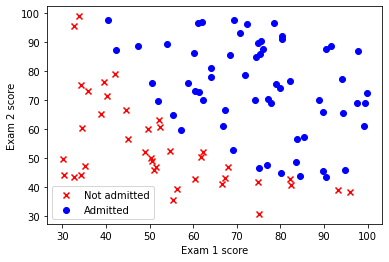

In [3]:
# Plot the data
plt.scatter(dp["Exam 1"][dp.Approve == 0], dp["Exam 2"][dp.Approve == 0],
           marker='x',
           color='red',
           label='Not admitted')

plt.scatter(dp["Exam 1"][dp.Approve == 1], dp["Exam 2"][dp.Approve == 1],
           marker='o',
           color='blue',
           label='Admitted')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

### 2.3 - Sigmoid Function

It is implemented the sigmoid function that shows the probability $f_{\vec{w},b}(\vec{x})=P(y=1|\vec{x};\vec{w},b)$, he model is represented as


$$f_{\vec{w},b}(\vec{x})=g(\vec{w} \cdot \vec{x} + b \tag{1})$$

Note that $g(z)$ is the Sigmoid function, which is defined as:

$$g(z)=\frac{1}{1-e^{-z}}|z=\vec{w} \cdot \vec{x} + b \tag{2}$$


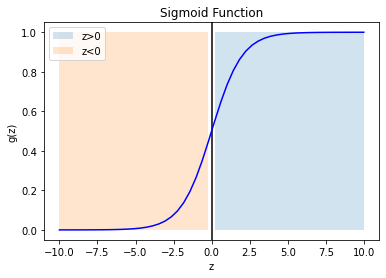

In [4]:
#Sigmoid implementation
def sigmoid(z):
    g_z = 1/(1+mt.e**(-z))
    
    return g_z

# Output of the sigmoid function
z_test = np.linspace(-10, 10, num=50)
g_test = sigmoid(z_test)

data_sig = {"z": z_test,
       "g(z)": g_test}

dp = pd.DataFrame(data_sig)

plt.axvline(x=0, c="black")
plt.plot(z_test, g_test, c="b")
plt.fill_between(dp["z"][dp.z >= 0], np.linspace(1,1, num=25), alpha=0.2, label="z>0")
plt.fill_between(dp["z"][dp.z <= 0], np.linspace(1,1, num=25), alpha=0.2, label="z<0")

plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('Sigmoid Function')
plt.legend()
plt.show()


### 2.4 - Cost function for Logistic Regression

The cost function for this type of classification model is

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{3}$$

Where the $loss$ is define as

$$loss_{f_{\vec{w},b}(\vec{x})}= -y^{(i)}\cdot log(f_{\vec{w},b}(\vec{x}))-(1-y^{(i)})\cdot(1-f_{\vec{w},b}(\vec{x})) \tag{4}$$

* **$y^{(i)}:$** Actual value of classifcation
* **$f_{\vec{w},b}(\vec{x}):$** Value computed by the sigmoid function

In [5]:
# Implementaion of the Cost Function

def compute_cost(X, y, w, b, lambda_= 1):  
    # Shape of the matriz
    m, n = X.shape
    # Cost inicialized
    total_cost = 0
    
    for i in range(m):
        # Calculation of Z
        z = np.dot(X[i], w) + b
        # Value of sigmoid function
        g_z = sigmoid(z)
        # Sum of the cost
        total_cost += (-y[i]*(np.log(g_z))-(1-y[i])*(np.log(1-g_z)))
    
    # Mean cost
    total_cost = total_cost/m
    
    return total_cost

### 2.5 Gradient for Logistic Regression

It is repeated the algorithm until the following expressions converges. The loop is defined by the length of the features.

$$w_{j}= w - \alpha \cdot \frac{\partial}{\partial w_{j}}J(\vec{x},b)|\frac{\partial}{\partial w_{j}}J(\vec{x},b) = \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{w,b}({x}^{(i)}) - \mathbf{y}^{(i)})\cdot x^{(i)} \tag{5}$$

$$b= b - \alpha \cdot \frac{\partial}{\partial b}J(\vec{x},b)|\frac{\partial}{\partial b}J(\vec{x},b)= \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{w,b}({x}^{(i)}) - \mathbf{y}^{(i)}) \tag{6}$$

Note that the values of $w_{j}$ and $b$ are updated only when the values of equations (5) and (6) are cuantify. 

In [6]:
def compute_gradient(X, y, w, b, lambda_=None): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    # Inicializaton of the error
    for i in range(m):
        # Calculation of the error
        z = np.dot(X[i], w) + b
        g_z = sigmoid(z)
        error = (g_z - y[i])
        
        for j in range(n):       
            # Gradient computation
            dj_dw[j] += error*X[i,j]
        dj_db += error
    
    # Mean    
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    # Training examples
    m = len(X)
    
    # Array for J and w
    J_h= []
    w_h = []
    
    for i in range(num_iters):

        # Gradient calculation 
        dj_db, dj_dw = compute_gradient(X, y, w_in, b_in, lambda_)   

        # Parameter update
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Resource exhaustion prevention
        if i<100000:      
            cost =  np.around(compute_cost(X, y, w_in, b_in, lambda_), 2)
        # Print every 1000 iter
        if i% mt.ceil(num_iters/10) == 0 or i == (num_iters-1):
            # Cost calculation
            cost =  compute_cost(X, y, w_in, b_in, lambda_)
            J_h.append(cost)
            w_h.append(w_in)
        
    return w_in, b_in, J_h, w_h

### 2.6 Learning Parameters

With the use of the gradient descendant algorithm, it is update the parameters values and the influence over the cost function. For a simpler way to analyse the performance, the data u

In [7]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b,cost_final,_ = gradient_descent(X_train ,Y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

data_final = {"Iteration": [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 9999],
             "Cost": cost_final}

dp_final = pd.DataFrame(data_final)
dp_final.head(11)


,Iteration,Cost
0,0,[0.9442988173753909]
1,1000,[0.3037918025492215]
2,2000,[0.30343219275729655]
3,3000,[0.3030749422298283]
4,4000,[0.30272002760414546]
5,5000,[0.3023674258252912]
6,6000,[0.30201711414101234]
7,7000,[0.3016690700968552]
8,8000,[0.30132327153134775]
9,9000,[0.30097969657127543]


### 2.7 - Plotting decision bondary

From the fist figure, then it is potted the decision boundary as shown a follows

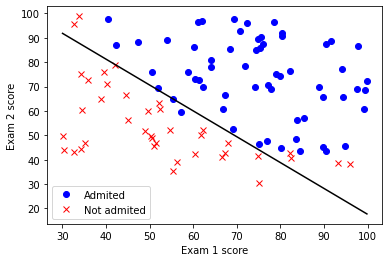

In [8]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    # Credit to DeepLearning Standford archives
     
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'o', label="Admited", c='blue')
    plt.plot(X[negative, 0], X[negative, 1], 'x', label="Not admited", c='red')
    
def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code
     
    plot_data(X[:, 0:2], y)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="black")
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0.5
        plt.contour(u,v,z, levels = [0.5], colors="g")

plot_decision_boundary(w, b, X_train, Y_train)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

### 2.8 - Evaluating the model

Finally, it is implemented a function that able the user predict base en the parameters found and whatever input. The code is showwn in the next cell:

In [9]:
def predict(X, w, b): 
    # number of training examples
    m, n = X.shape   
    
    # prediction
    p = np.zeros(m)
    
    # Threshold
    th = 0.5
   
    for i in range(m):   
        z = np.dot(X[i], w) + b
        f_wb = sigmoid(z)
        
        if f_wb < th:
            p[i] = 0
        else:
            p[i] = 1
    return p

Futhermore, it is cuantify the accuracy of the train

In [10]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == Y_train) * 100))

Train Accuracy: 91.919192


Then, it can be cocnluded that the train can classify effectivily base on the two grades inputs.